In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
from collections import Counter
from nltk.tokenize import LineTokenizer, SpaceTokenizer, TweetTokenizer
from nltk import word_tokenize
from nltk import word_tokenize, PorterStemmer, WordNetLemmatizer
import string
import matplotlib
import re
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.metrics import mean_squared_error

## Reading the file

In [2]:
# Using the interactive shell to see values of multiple statements at once
df=pd.read_csv('//Users//vaibhavagarwal//Desktop//ML-NEU//MercarI//all//train.tsv',sep='\t',header=0)


In [3]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vaibhavagarwal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vaibhavagarwal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Finding records with missing brands

In [4]:
df_miss=df[df.brand_name.isna()]
df_miss.shape
df_miss_50000=df_miss[0:50000:]
df_miss_50000.head(5) 
df_miss_50000.tail(5)
df_miss_50000=df_miss[0:50000:]

(632682, 8)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
116405,116405,Surgical Steel Tiny Stars Earrings,2,Women/Jewelry/Earrings,NaN,9.0,0,Great for people with alloy/nickel allergy... ...
116406,116406,6x Iphone 5 6 7 certified chargers,1,Electronics/Cell Phones & Accessories/Cell Pho...,NaN,9.0,1,6x Iphone 5 6 7 certified chargers Free shippi...
116408,116408,iPhone 6 Plus/6sPlus case marble mixblue,1,Electronics/Cell Phones & Accessories/Cell Pho...,NaN,8.0,1,For iPhone 6 Plus and iPhone 6S plus New soft ...
116411,116411,Squishy Lot of 3,1,Vintage & Collectibles/Antique/Collectibles,NaN,53.0,1,"Includes Ibloom gold bar, Mini Hayaru cake sli..."
116412,116412,Maidenform Waist Cincher,2,Women/Underwear/Other,NaN,8.0,1,New size 2X. Remember I will combine shipping ...


## Sub-categorizing categories into 3 types

In [5]:
def subCategorize(category):
    try: return category.split("/")
    except: return ("NoLabel","NoLabel","NoLabel")
    

df['sub_cat1'],df['sub_cat2'],df['sub_cat3']=\
zip(*df['category_name'].apply(lambda x:subCategorize(x)))

## Concatenating categorial features together 

In [6]:
df['text']=df['name'].map(str)+ ' ' + df['sub_cat1'].map(str)+ ' ' + df['sub_cat2'].map(str)+' ' + df['sub_cat3'].map(str)+' '+ df['brand_name'].map(str)+' '+ df['item_description'].map(str)

In [7]:
df.head(100)
df[df.item_description!='No description yet']

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts,MLB Cincinnati Reds T Shirt Size XL Men Tops T...
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,Razer BlackWidow Chroma Keyboard Electronics C...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,AVA-VIV Blouse Women Tops & Blouses Blouse Tar...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,Leather Horse Statues Home Home Décor Home Déc...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,24K GOLD plated rose Women Jewelry Necklaces n...
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma...",Women,Other,Other,Bundled items requested for Ruie Women Other O...
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,Women,Swimwear,Two-Piece,Acacia pacific tides santorini top Women Swimw...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,Sports & Outdoors,Apparel,Girls,Girls cheer and tumbling bundle of 7 Sports & ...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,Sports & Outdoors,Apparel,Girls,Girls Nike Pro shorts Sports & Outdoors Appare...
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...,Vintage & Collectibles,Collectibles,Doll,Porcelain clown doll checker pants VTG Vintage...


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,Razer BlackWidow Chroma Keyboard Electronics C...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,AVA-VIV Blouse Women Tops & Blouses Blouse Tar...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,Leather Horse Statues Home Home Décor Home Déc...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,24K GOLD plated rose Women Jewelry Necklaces n...
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma...",Women,Other,Other,Bundled items requested for Ruie Women Other O...
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,Women,Swimwear,Two-Piece,Acacia pacific tides santorini top Women Swimw...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,Sports & Outdoors,Apparel,Girls,Girls cheer and tumbling bundle of 7 Sports & ...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,Sports & Outdoors,Apparel,Girls,Girls Nike Pro shorts Sports & Outdoors Appare...
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...,Vintage & Collectibles,Collectibles,Doll,Porcelain clown doll checker pants VTG Vintage...
10,10,Smashbox primer,2,Beauty/Makeup/Face,Smashbox,8.0,1,0.25 oz Full size is 1oz for [rm] in Sephora,Beauty,Makeup,Face,Smashbox primer Beauty Makeup Face Smashbox 0....


## Exploratory analysis on Categories

In [8]:
print("There are %d unique first sub-categories." % df['sub_cat1'].nunique())
print("There are %d unique first sub-categories." % df['sub_cat2'].nunique())
print("There are %d unique first sub-categories." % df['sub_cat3'].nunique())

There are 11 unique first sub-categories.
There are 114 unique first sub-categories.
There are 871 unique first sub-categories.


Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
NoLabel                     6327
Name: sub_cat1, dtype: int64

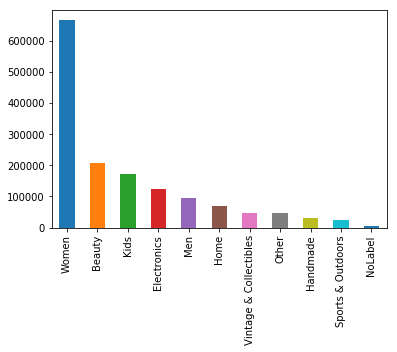

In [9]:
%matplotlib inline 
cat_counts=df['sub_cat1'].value_counts()
cat_counts
cat_counts.plot(kind="bar")


## Text preprocessing using
- Regular Expressions
- Tokenizers
- Stemming
- Lemmatizers


In [10]:
def removeSpecialCharacters(text):
    return text.translate ({ord(c): " " for c in "!@#$%^&*()[]{};:,./<>?\|`~-=_+"})
df['text'].apply(lambda x:removeSpecialCharacters(x))

0          MLB Cincinnati Reds T Shirt Size XL Men Tops T...
1          Razer BlackWidow Chroma Keyboard Electronics C...
2          AVA VIV Blouse Women Tops   Blouses Blouse Tar...
3          Leather Horse Statues Home Home Décor Home Déc...
4          24K GOLD plated rose Women Jewelry Necklaces n...
5          Bundled items requested for Ruie Women Other O...
6          Acacia pacific tides santorini top Women Swimw...
7          Girls cheer and tumbling bundle of 7 Sports   ...
8          Girls Nike Pro shorts Sports   Outdoors Appare...
9          Porcelain clown doll checker pants VTG Vintage...
10         Smashbox primer Beauty Makeup Face Smashbox 0 ...
11         New vs pi k body mists Beauty Fragrance Women ...
12         Black Skater dress Women Dresses Above Knee  M...
13         Sharpener and eraser Other Office supplies Sch...
14         HOLD for Dogs2016 Minnetonka boots Women Shoes...
15         Sephora tarte birthday gift Beauty Makeup Make...
16         Glitter Eyesh

In [11]:
# apply word tokenize to extract tokens from every text row
# word_tokens=df_miss['text'].apply(word_tokenize)
# word_tokens.head(2)
# apply tweet tokenizer to extract tokens from every text row
tTokenizer = TweetTokenizer()
tweet_tokens=df['text'].apply(tTokenizer.tokenize)
tweet_tokens.head(2)

# storing tweet tokens in new derived column of dataset
df['tokens']=tweet_tokens
df.head(2)



0    [MLB, Cincinnati, Reds, T, Shirt, Size, XL, Me...
1    [Razer, BlackWidow, Chroma, Keyboard, Electron...
Name: text, dtype: object

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text,tokens
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts,MLB Cincinnati Reds T Shirt Size XL Men Tops T...,"[MLB, Cincinnati, Reds, T, Shirt, Size, XL, Me..."
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,Razer BlackWidow Chroma Keyboard Electronics C...,"[Razer, BlackWidow, Chroma, Keyboard, Electron..."


In [12]:
#  Derive the size column by picking up numbers before removing the numbers from tokens list
def getSize(token):
    indices=[ind for ind,w in enumerate(token) if re.search('^[Ss][i][z][e]$',w)]
    sizes=[token[index+1] for index in indices if index<len(token)-1]
    return sizes

df['Size']=df['tokens'].apply(lambda x:getSize(x))
# lets check the df for size column where it has values
df[df['Size'].str.len()>0].head(5)



,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text,tokens,Size
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts,MLB Cincinnati Reds T Shirt Size XL Men Tops T...,"[MLB, Cincinnati, Reds, T, Shirt, Size, XL, Me...",[XL]
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,Women,Swimwear,Two-Piece,Acacia pacific tides santorini top Women Swimw...,"[Acacia, pacific, tides, santorini, top, Women...",[small]
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,Sports & Outdoors,Apparel,Girls,Girls cheer and tumbling bundle of 7 Sports & ...,"[Girls, cheer, and, tumbling, bundle, of, 7, S...",[small]
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,Sports & Outdoors,Apparel,Girls,Girls Nike Pro shorts Sports & Outdoors Appare...,"[Girls, Nike, Pro, shorts, Sports, &, Outdoors...",[small]
10,10,Smashbox primer,2,Beauty/Makeup/Face,Smashbox,8.0,1,0.25 oz Full size is 1oz for [rm] in Sephora,Beauty,Makeup,Face,Smashbox primer Beauty Makeup Face Smashbox 0....,"[Smashbox, primer, Beauty, Makeup, Face, Smash...",[is]


In [13]:
stopwords = nltk.corpus.stopwords.words('english')
wordnet_lemmatizer = WordNetLemmatizer()
#Using tweet tokenizers for further preprocessing
def tokenizer(tokens):
    tokens= list(filter(lambda t: t not in punctuation, tokens))
    tokens = list(filter(lambda t: t.lower() not in stopwords, tokens))
    tokens_filtered = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            tokens_filtered.append(token)
    tokens_filtered = list(map(lambda token: wordnet_lemmatizer.lemmatize(token.lower()), tokens_filtered))
    tokens_filtered = list(filter(lambda t: t not in punctuation, tokens_filtered))
    return tokens_filtered
# overriding the tokens now will filtered token       
# df_miss['tokens']=tokens_filtered  
# df_miss.head(2) 
df['tokens']=df['tokens'].map(tokenizer)
df.head(2)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text,tokens,Size
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts,MLB Cincinnati Reds T Shirt Size XL Men Tops T...,"[mlb, cincinnati, red, shirt, size, xl, men, t...",[XL]
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,Razer BlackWidow Chroma Keyboard Electronics C...,"[razer, blackwidow, chroma, keyboard, electron...",[]


In [14]:
# getting the mostcommon word used for each row in the dataset
def getmostCommonword(tokens):
    fdistPlain = nltk.FreqDist(tokens)
    return (fdistPlain.most_common(1)[0][0])

df['MostCommonWord']=df['tokens'].map(getmostCommonword)
df.head(100)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text,tokens,Size,MostCommonWord
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts,MLB Cincinnati Reds T Shirt Size XL Men Tops T...,"[mlb, cincinnati, red, shirt, size, xl, men, t...",[XL],mlb
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,Razer BlackWidow Chroma Keyboard Electronics C...,"[razer, blackwidow, chroma, keyboard, electron...",[],razer
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,AVA-VIV Blouse Women Tops & Blouses Blouse Tar...,"[ava-viv, blouse, woman, top, blouse, blouse, ...",[],blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,Leather Horse Statues Home Home Décor Home Déc...,"[leather, horse, statue, home, home, décor, ho...",[],home
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,24K GOLD plated rose Women Jewelry Necklaces n...,"[24k, gold, plated, rose, woman, jewelry, neck...",[],24k
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma...",Women,Other,Other,Bundled items requested for Ruie Women Other O...,"[bundled, item, requested, ruie, woman, nan, b...",[],bottom
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,Women,Swimwear,Two-Piece,Acacia pacific tides santorini top Women Swimw...,"[acacia, pacific, tide, santorini, top, woman,...",[small],acacia
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,Sports & Outdoors,Apparel,Girls,Girls cheer and tumbling bundle of 7 Sports & ...,"[girl, cheer, tumbling, bundle, sport, outdoor...",[small],girl
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,Sports & Outdoors,Apparel,Girls,Girls Nike Pro shorts Sports & Outdoors Appare...,"[girl, nike, pro, short, sport, outdoors, appa...",[small],girl
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...,Vintage & Collectibles,Collectibles,Doll,Porcelain clown doll checker pants VTG Vintage...,"[porcelain, clown, doll, checker, pant, vtg, v...",[],clown


In [15]:
# selecting unique brand names present in the dataset
df_brands=df[(~df.brand_name.isin(df_miss.brand_name))]
df_unique_brands=df_brands['brand_name'].value_counts().index.tolist()
df_unique_brands
# type(uniq_brands)


['PINK',
 'Nike',
 "Victoria's Secret",
 'LuLaRoe',
 'Apple',
 'FOREVER 21',
 'Nintendo',
 'Lululemon',
 'Michael Kors',
 'American Eagle',
 'Rae Dunn',
 'Sephora',
 'Coach',
 'Disney',
 'Bath & Body Works',
 'Adidas',
 'Funko',
 'Under Armour',
 'Sony',
 'Old Navy',
 'Hollister',
 "Carter's",
 'Urban Decay',
 'The North Face',
 'Independent',
 'Too Faced',
 'Xbox',
 'Brandy Melville',
 'Kate Spade',
 'MAC',
 'Kendra Scott',
 'Gap',
 'Tarte',
 'UGG Australia',
 'VANS',
 'Polo Ralph Lauren',
 'Charlotte Russe',
 'Samsung',
 'SeneGence',
 'Vera Bradley',
 'Ralph Lauren',
 'Converse',
 'H&M',
 'Air Jordan',
 'Free People',
 'Tory Burch',
 'Miss Me',
 'Express',
 'Louis Vuitton',
 'Abercrombie & Fitch',
 'NYX',
 'Hot Topic',
 'Pokemon',
 'Lilly Pulitzer',
 'Calvin Klein',
 'Kylie Cosmetics',
 "Levi's®",
 'PANDORA',
 'Mary Kay',
 'American Boy & Girl',
 'Anastasia Beverly Hills',
 'Torrid',
 'Chanel',
 'Benefit',
 'Tommy Hilfiger',
 'Steve Madden',
 'Mossimo',
 'Scentsy',
 'Aeropostale',
 '

In [16]:
df_brands.shape
df[df.brand_name.isna()].shape
df.shape

(849853, 15)

(632682, 15)

(1482535, 15)

## Fuzzyset to predict Brand names for the missing brands

In [17]:
import fuzzyset
 
fz = fuzzyset.FuzzySet()
#Create a list of terms we would like to match against in a fuzzy way
for brand in df_unique_brands:
    fz.add(brand)
 
#Now see if our sample term fuzzy matches any of those specified terms
def estimatebrandMatches(word):
    return fz.get(word)

df['brand_prediction']=df['MostCommonWord'].map(estimatebrandMatches)
    

In [21]:
df.head(5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text,tokens,Size,MostCommonWord,brand_prediction
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts,MLB Cincinnati Reds T Shirt Size XL Men Tops T...,"[mlb, cincinnati, red, shirt, size, xl, men, t...",[XL],mlb,"[(1, MLB)]"
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,Razer BlackWidow Chroma Keyboard Electronics C...,"[razer, blackwidow, chroma, keyboard, electron...",[],razer,"[(1, Razer)]"
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,AVA-VIV Blouse Women Tops & Blouses Blouse Tar...,"[ava-viv, blouse, woman, top, blouse, blouse, ...",[],blouse,"[(0.6666666666666667, BLUE), (0.66666666666666..."
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,Leather Horse Statues Home Home Décor Home Déc...,"[leather, horse, statue, home, home, décor, ho...",[],home,"[(0.8, iHome)]"
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,24K GOLD plated rose Women Jewelry Necklaces n...,"[24k, gold, plated, rose, woman, jewelry, neck...",[],24k,"[(0.09999999999999998, 24/7 Comfort Apparel)]"


In [22]:
df_copy=df.assign(**df.brand_prediction.apply(pd.Series).add_prefix('val_'))
df_copy.head(100)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,...,val_40,val_41,val_42,val_43,val_44,val_45,val_46,val_47,val_48,val_49
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma...",Women,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,Women,Swimwear,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,Sports & Outdoors,Apparel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,Sports & Outdoors,Apparel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...,Vintage & Collectibles,Collectibles,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_copy=df_copy.drop(['val_1', 'val_2', 'val_3', 'val_4',
       'val_5', 'val_6', 'val_7', 'val_8', 'val_9', 'val_10', 'val_11',
       'val_12', 'val_13', 'val_14', 'val_15', 'val_16', 'val_17', 'val_18'],axis=1)




In [20]:
df_copy.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'sub_cat1', 'sub_cat2',
       'sub_cat3', 'text', 'tokens', 'Size', 'MostCommonWord',
       'brand_prediction', 'val_0', 'val_1', 'val_2', 'val_3', 'val_4',
       'val_5', 'val_6', 'val_7', 'val_8', 'val_9', 'val_10', 'val_11',
       'val_12', 'val_13', 'val_14', 'val_15', 'val_16', 'val_17', 'val_18',
       'val_19', 'val_20', 'val_21', 'val_22', 'val_23', 'val_24', 'val_25',
       'val_26', 'val_27', 'val_28', 'val_29', 'val_30', 'val_31', 'val_32',
       'val_33', 'val_34', 'val_35', 'val_36', 'val_37', 'val_38', 'val_39',
       'val_40', 'val_41', 'val_42', 'val_43', 'val_44', 'val_45', 'val_46',
       'val_47', 'val_48', 'val_49'],
      dtype='object')

In [18]:
df_copy['val_0'].head(7)

0                                        (1, MLB)
3                                    (0.8, iHome)
4     (0.09999999999999998, 24/7 Comfort Apparel)
5                    (0.6666666666666667, TomTom)
9                                     (0.6, Lowa)
17                                (0.5, Babyhome)
23                   (0.7142857142857143, Chaser)
Name: val_0, dtype: object

In [19]:
df_copy[['confidence_level','brand_name_predicted']]=df_copy['val_0'].apply(pd.Series)

In [20]:
df_copy.head(7)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text,tokens,Size,MostCommonWord,brand_prediction,val_0,confidence_level,brand_name_predicted
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts,MLB Cincinnati Reds T Shirt Size XL Men Tops T...,"[mlb, cincinnati, red, shirt, size, xl, men, t...",[XL],mlb,"[(1, MLB)]","(1, MLB)",1.000000,MLB
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,Leather Horse Statues Home Home Décor Home Déc...,"[leather, horse, statue, home, home, décor, ho...",[],home,"[(0.8, iHome)]","(0.8, iHome)",0.800000,iHome
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,24K GOLD plated rose Women Jewelry Necklaces n...,"[24k, gold, plated, rose, woman, jewelry, neck...",[],24k,"[(0.09999999999999998, 24/7 Comfort Apparel)]","(0.09999999999999998, 24/7 Comfort Apparel)",0.100000,24/7 Comfort Apparel
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma...",Women,Other,Other,Bundled items requested for Ruie Women Other O...,"[bundled, item, requested, ruie, woman, nan, b...",[],bottom,"[(0.6666666666666667, TomTom), (0.666666666666...","(0.6666666666666667, TomTom)",0.666667,TomTom
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...,Vintage & Collectibles,Collectibles,Doll,Porcelain clown doll checker pants VTG Vintage...,"[porcelain, clown, doll, checker, pant, vtg, v...",[],clown,"[(0.6, Lowa), (0.6, CLEAN)]","(0.6, Lowa)",0.600000,Lowa
17,17,New: Baby K'tan active baby carrier,1,Kids/Gear/Backpacks & Carriers,NaN,29.0,1,Brand new in box Size: Medium Color: Coral Ret...,Kids,Gear,Backpacks & Carriers,New: Baby K'tan active baby carrier Kids Gear ...,"[new, baby, k'tan, active, baby, carrier, kid,...",[:],baby,"[(0.5, Babyhome), (0.5, MAM Baby), (0.5, UPPAb...","(0.5, Babyhome)",0.500000,Babyhome
23,23,Triple car charger,1,Electronics/Cell Phones & Accessories/Chargers...,NaN,8.0,1,Brand new never used All colors are available ...,Electronics,Cell Phones & Accessories,Chargers & Cradles,Triple car charger Electronics Cell Phones & A...,"[triple, car, charger, electronics, cell, phon...",[],charger,"[(0.7142857142857143, Chaser), (0.714285714285...","(0.7142857142857143, Chaser)",0.714286,Chaser


In [22]:
df[['confidence_level','brand_name_predicted']]=df_copy[['confidence_level','brand_name_predicted']]



/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [23]:
df.head(100)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text,tokens,Size,MostCommonWord,brand_prediction,confidence_level,brand_name_predicted
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts,MLB Cincinnati Reds T Shirt Size XL Men Tops T...,"[mlb, cincinnati, red, shirt, size, xl, men, t...",[XL],mlb,"[(1, MLB)]",1.000000,MLB
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,Leather Horse Statues Home Home Décor Home Déc...,"[leather, horse, statue, home, home, décor, ho...",[],home,"[(0.8, iHome)]",0.800000,iHome
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,24K GOLD plated rose Women Jewelry Necklaces n...,"[24k, gold, plated, rose, woman, jewelry, neck...",[],24k,"[(0.09999999999999998, 24/7 Comfort Apparel)]",0.100000,24/7 Comfort Apparel
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma...",Women,Other,Other,Bundled items requested for Ruie Women Other O...,"[bundled, item, requested, ruie, woman, nan, b...",[],bottom,"[(0.6666666666666667, TomTom), (0.666666666666...",0.666667,TomTom
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...,Vintage & Collectibles,Collectibles,Doll,Porcelain clown doll checker pants VTG Vintage...,"[porcelain, clown, doll, checker, pant, vtg, v...",[],clown,"[(0.6, Lowa), (0.6, CLEAN)]",0.600000,Lowa
17,17,New: Baby K'tan active baby carrier,1,Kids/Gear/Backpacks & Carriers,NaN,29.0,1,Brand new in box Size: Medium Color: Coral Ret...,Kids,Gear,Backpacks & Carriers,New: Baby K'tan active baby carrier Kids Gear ...,"[new, baby, k'tan, active, baby, carrier, kid,...",[:],baby,"[(0.5, Babyhome), (0.5, MAM Baby), (0.5, UPPAb...",0.500000,Babyhome
23,23,Triple car charger,1,Electronics/Cell Phones & Accessories/Chargers...,NaN,8.0,1,Brand new never used All colors are available ...,Electronics,Cell Phones & Accessories,Chargers & Cradles,Triple car charger Electronics Cell Phones & A...,"[triple, car, charger, electronics, cell, phon...",[],charger,"[(0.7142857142857143, Chaser), (0.714285714285...",0.714286,Chaser
31,31,"New Lularoe OS leggings, stars",1,"Women/Athletic Apparel/Pants, Tights, Leggings",NaN,50.0,1,No description yet,Women,Athletic Apparel,"Pants, Tights, Leggings","New Lularoe OS leggings, stars Women Athletic ...","[new, lularoe, o, legging, star, woman, athlet...",[],legging,"[(0.4444444444444444, Breitling)]",0.444444,Breitling
34,34,Four puppy dog stuffed animal ty,3,Kids/Toys/Stuffed Animals & Plush,NaN,5.0,1,2 beanie babies pugsley wrinkles Puppy with pu...,Kids,Toys,Stuffed Animals & Plush,Four puppy dog stuffed animal ty Kids Toys Stu...,"[four, puppy, dog, stuffed, animal, ty, kid, t...",[],pinup,"[(0.6, PINK), (0.6, PING), (0.6, Pinky)]",0.600000,PINK
35,35,Black Capri Leggings w/ Flowers One size,1,"Women/Athletic Apparel/Pants, Tights, Leggings",NaN,13.0,1,One size fits sizes 2-12 92% polyester 8% span...,Women,Athletic Apparel,"Pants, Tights, Leggings",Black Capri Leggings w/ Flowers One size Women...,"[black, capri, legging, w, flower, one, size, ...","[Women, fits]",legging,"[(0.4444444444444444, Breitling)]",0.444444,Breitling


In [27]:
df[df.confidence_level>=0.5].shape

# 10,000 brands are predicted with the. confidence level>0.75 in 50000 missing records...
# df_miss_50000['brand_name'].fillna(df_miss_50000['Cat2'])

(47162, 18)

In [24]:
df.loc[df.confidence_level>=0.5, 'brand_name' ] = df.loc[df.confidence_level>=0.5, 'brand_name_predicted']

# this helps assign brand names for 47162 records out of 50000


/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text,tokens,Size,MostCommonWord,brand_prediction,confidence_level,brand_name_predicted
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,MLB,10.0,1,No description yet,Men,Tops,T-shirts,MLB Cincinnati Reds T Shirt Size XL Men Tops T...,"[mlb, cincinnati, red, shirt, size, xl, men, t...",[XL],mlb,"[(1, MLB)]",1.000000,MLB
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,iHome,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,Leather Horse Statues Home Home Décor Home Déc...,"[leather, horse, statue, home, home, décor, ho...",[],home,"[(0.8, iHome)]",0.800000,iHome
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,24K GOLD plated rose Women Jewelry Necklaces n...,"[24k, gold, plated, rose, woman, jewelry, neck...",[],24k,"[(0.09999999999999998, 24/7 Comfort Apparel)]",0.100000,24/7 Comfort Apparel
5,5,Bundled items requested for Ruie,3,Women/Other/Other,TomTom,59.0,0,"Banana republic bottoms, Candies skirt with ma...",Women,Other,Other,Bundled items requested for Ruie Women Other O...,"[bundled, item, requested, ruie, woman, nan, b...",[],bottom,"[(0.6666666666666667, TomTom), (0.666666666666...",0.666667,TomTom
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,Lowa,8.0,0,I realized his pants are on backwards after th...,Vintage & Collectibles,Collectibles,Doll,Porcelain clown doll checker pants VTG Vintage...,"[porcelain, clown, doll, checker, pant, vtg, v...",[],clown,"[(0.6, Lowa), (0.6, CLEAN)]",0.600000,Lowa
17,17,New: Baby K'tan active baby carrier,1,Kids/Gear/Backpacks & Carriers,Babyhome,29.0,1,Brand new in box Size: Medium Color: Coral Ret...,Kids,Gear,Backpacks & Carriers,New: Baby K'tan active baby carrier Kids Gear ...,"[new, baby, k'tan, active, baby, carrier, kid,...",[:],baby,"[(0.5, Babyhome), (0.5, MAM Baby), (0.5, UPPAb...",0.500000,Babyhome
23,23,Triple car charger,1,Electronics/Cell Phones & Accessories/Chargers...,Chaser,8.0,1,Brand new never used All colors are available ...,Electronics,Cell Phones & Accessories,Chargers & Cradles,Triple car charger Electronics Cell Phones & A...,"[triple, car, charger, electronics, cell, phon...",[],charger,"[(0.7142857142857143, Chaser), (0.714285714285...",0.714286,Chaser
31,31,"New Lularoe OS leggings, stars",1,"Women/Athletic Apparel/Pants, Tights, Leggings",NaN,50.0,1,No description yet,Women,Athletic Apparel,"Pants, Tights, Leggings","New Lularoe OS leggings, stars Women Athletic ...","[new, lularoe, o, legging, star, woman, athlet...",[],legging,"[(0.4444444444444444, Breitling)]",0.444444,Breitling
34,34,Four puppy dog stuffed animal ty,3,Kids/Toys/Stuffed Animals & Plush,PINK,5.0,1,2 beanie babies pugsley wrinkles Puppy with pu...,Kids,Toys,Stuffed Animals & Plush,Four puppy dog stuffed animal ty Kids Toys Stu...,"[four, puppy, dog, stuffed, animal, ty, kid, t...",[],pinup,"[(0.6, PINK), (0.6, PING), (0.6, Pinky)]",0.600000,PINK
35,35,Black Capri Leggings w/ Flowers One size,1,"Women/Athletic Apparel/Pants, Tights, Leggings",NaN,13.0,1,One size fits sizes 2-12 92% polyester 8% span...,Women,Athletic Apparel,"Pants, Tights, Leggings",Black Capri Leggings w/ Flowers One size Women...,"[black, capri, legging, w, flower, one, size, ...","[Women, fits]",legging,"[(0.4444444444444444, Breitling)]",0.444444,Breitling


(50000, 18)

In [28]:
df_miss_50000.to_pickle('/Users/vaibhavagarwal/Desktop/df_50000') 


In [30]:
df_new=pd.read_pickle('/Users/vaibhavagarwal/Desktop/df_50000'
                     )

In [31]:
df_new.head(5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text,tokens,Size,MostCommonWord,brand_prediction,confidence_level,brand_name_predicted
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,MLB,10.0,1,No description yet,Men,Tops,T-shirts,MLB Cincinnati Reds T Shirt Size XL Men Tops T...,"[mlb, cincinnati, red, shirt, size, xl, men, t...",[XL],mlb,"[(1, MLB)]",1.000000,MLB
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,iHome,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,Leather Horse Statues Home Home Décor Home Déc...,"[leather, horse, statue, home, home, décor, ho...",[],home,"[(0.8, iHome)]",0.800000,iHome
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,24K GOLD plated rose Women Jewelry Necklaces n...,"[24k, gold, plated, rose, woman, jewelry, neck...",[],24k,"[(0.09999999999999998, 24/7 Comfort Apparel)]",0.100000,24/7 Comfort Apparel
5,5,Bundled items requested for Ruie,3,Women/Other/Other,TomTom,59.0,0,"Banana republic bottoms, Candies skirt with ma...",Women,Other,Other,Bundled items requested for Ruie Women Other O...,"[bundled, item, requested, ruie, woman, nan, b...",[],bottom,"[(0.6666666666666667, TomTom), (0.666666666666...",0.666667,TomTom
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,Lowa,8.0,0,I realized his pants are on backwards after th...,Vintage & Collectibles,Collectibles,Doll,Porcelain clown doll checker pants VTG Vintage...,"[porcelain, clown, doll, checker, pant, vtg, v...",[],clown,"[(0.6, Lowa), (0.6, CLEAN)]",0.600000,Lowa


In [32]:
brands=df['brand_name'].value_counts().index.tolist()

In [40]:
# MAKING SURE THAT BRAND_NAME PREDICTED IS IN THE ORIGINAL LIST OF BRANDS
count=0
for index,row in df_miss_50000.iterrows():
    if df_miss_50000.loc[index,'brand_name'] in brands:
        count=count+1
#         print(df_miss_50000.loc[index,'brand_name'])

print(count)

47162


In [41]:
df[df.brand_name=="MLB"]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
240,240,1998 SP Authentic Derek Jeter,2,Vintage & Collectibles/Trading Cards/Sports,MLB,3.0,1,1998 SP Authentic Derek Jeter #145
3972,3972,2015 Topps Sandy Koufax insert,2,Vintage & Collectibles/Trading Cards/Sports,MLB,3.0,1,2015 Topps Highlight of the Year Sandy Koufax ...
8149,8149,2009 Signature Stars baseball card box,1,Vintage & Collectibles/Trading Cards/Sports,MLB,65.0,1,2009 Signature Stars baseball card box The fir...
10494,10494,Dansby Swanson 2017 Topps RC,2,Vintage & Collectibles/Trading Cards/Sports,MLB,3.0,1,2017 Topps RC
11459,11459,2015 Donruss Press Proof Clayton Kershaw,2,Vintage & Collectibles/Trading Cards/Sports,MLB,3.0,1,2015 Donruss Press Proof Clayton Kershaw seria...
12637,12637,Cal Ripken & Earl Weaver,3,Vintage & Collectibles/Trading Cards/Sports,MLB,6.0,1,1987- Earl Weaver Topps 1985- Cal Ripken Diamo...
19910,19910,1999 Topps Baseball Set Series 1 & 2,2,Vintage & Collectibles/Trading Cards/Sports,MLB,20.0,1,1999 Topps Baseball Set Series 1 & 2 Seal has ...
20167,20167,Kris Bryant 2016 Topps Bunt Card,2,Vintage & Collectibles/Trading Cards/Sports,MLB,3.0,1,2016 Topps Bunt
21406,21406,Bowman Silver Christian Yelich /499,2,Vintage & Collectibles/Trading Cards/Sports,MLB,3.0,1,No description yet
24801,24801,For 007taz vintage plus youngs,1,Vintage & Collectibles/Trading Cards/Sports,MLB,65.0,1,2016 Bowman Kyle Schwarber (2) 2013 Trevor Sto...


In [74]:
def checkforfloat(word):
    if re.search('[0-9]', word):
        return (word)

df['cat_with_float']=df['sub_cat3'].map(checkforfloat)        
            
# getting the mostcommon word used for each row in the dataset
# def getmostCommonword(tokens):
#     fdistPlain = nltk.FreqDist(tokens)
#     return (fdistPlain.most_common(1)[0][0])

# df_miss_50000['MostCommonWord']=df_miss_50000['tokens'].map(getmostCommonword)
# df_miss_50000.head(100)


/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [76]:
df[~(df.cat_with_float.isna())]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text,tokens,Size,MostCommonWord,brand_prediction,confidence_level,brand_name_predicted,cat_with_float
1449,1449,Indian cents,3,Vintage & Collectibles/Antique/100 Years or Older,Indah,14.0,0,1902.1903.1905.1907.,Vintage & Collectibles,Antique,100 Years or Older,Indian cents Vintage & Collectibles Antique 10...,"[indian, cent, vintage, collectible, antique, ...",[],indian,"[(0.6666666666666667, Indah)]",0.666667,Indah,100 Years or Older
2435,2435,VINTAGE!(4)1940'S ASCO SPICE TINS,3,Vintage & Collectibles/Antique/50 To 75 Years,Justin,20.0,0,These are in fair too good condition with some...,Vintage & Collectibles,Antique,50 To 75 Years,VINTAGE!(4)1940'S ASCO SPICE TINS Vintage & Co...,"[vintage, asco, spice, tin, vintage, collectib...",[],tin,"[(0.5, Justin), (0.5, Tide), (0.5, Tilt), (0.5...",0.500000,Justin,50 To 75 Years
2948,2948,U.S. 1969 P & D Coin Set In Cellophane,2,Vintage & Collectibles/Antique/50 To 75 Years,Cos,10.0,1,Up for sale: *1 U.S. 1969 P & D Coin Set In Ce...,Vintage & Collectibles,Antique,50 To 75 Years,U.S. 1969 P & D Coin Set In Cellophane Vintage...,"[u, p, coin, set, cellophane, vintage, collect...",[],coin,"[(0.5, Cos), (0.5, Com), (0.5, Coty), (0.5, GA...",0.500000,Cos,50 To 75 Years
4763,4763,Customcoinrings 5 quarters silver,4,Vintage & Collectibles/Antique/100 Years or Older,Custom Accessories,23.0,1,Coin collection,Vintage & Collectibles,Antique,100 Years or Older,Customcoinrings 5 quarters silver Vintage & Co...,"[customcoinrings, quarter, silver, vintage, co...",[],customcoinrings,"[(0.5, Custom Accessories)]",0.500000,Custom Accessories,100 Years or Older
4982,4982,Antique Iron,3,Vintage & Collectibles/Antique/75 To 100 Years,IRO,21.0,0,"American Beauty Iron. Wood handle. Iron, stand...",Vintage & Collectibles,Antique,75 To 100 Years,Antique Iron Vintage & Collectibles Antique 75...,"[antique, iron, vintage, collectible, antique,...",[],iron,"[(0.75, IRO), (0.75, Icon)]",0.750000,IRO,75 To 100 Years
7359,7359,Antique enamelware pale bucket wooden ha,4,Vintage & Collectibles/Antique/50 To 75 Years,Latique,27.0,0,Vintage antique enamelware bucket with wooden ...,Vintage & Collectibles,Antique,50 To 75 Years,Antique enamelware pale bucket wooden ha Vinta...,"[antique, enamelware, pale, bucket, wooden, ha...",[],antique,"[(0.7142857142857143, Latique), (0.71428571428...",0.714286,Latique,50 To 75 Years
8864,8864,Old coins,3,Vintage & Collectibles/Antique/100 Years or Older,Olay,7.0,0,U.S .MINT.philadelphia 1969 dept of the,Vintage & Collectibles,Antique,100 Years or Older,Old coins Vintage & Collectibles Antique 100 Y...,"[old, coin, vintage, collectible, antique, yea...",[],old,"[(0.5, Olay), (0.5, Olga), (0.5, Holden)]",0.500000,Olay,100 Years or Older
29741,29741,1858 Flying Eagle Cent,4,Vintage & Collectibles/Antique/100 Years or Older,Cos,8.0,1,1858 Flying Eagle Cent in great shape for its ...,Vintage & Collectibles,Antique,100 Years or Older,1858 Flying Eagle Cent Vintage & Collectibles ...,"[flying, eagle, cent, vintage, collectible, an...",[],coin,"[(0.5, Cos), (0.5, Com), (0.5, Coty), (0.5, GA...",0.500000,Cos,100 Years or Older
36913,36913,U.S. Series 1935 E Silver Certificate,3,Vintage & Collectibles/Antique/75 To 100 Years,NaN,7.0,1,Up for sale: *1 U.S. Series 1935 E [rm] Silver...,Vintage & Collectibles,Antique,75 To 100 Years,U.S. Series 1935 E Silver Certificate Vintage ...,"[u, series, e, silver, certificate, vintage, c...",[],certificate,"[(0.4545454545454546, CeraVe), (0.454545454545...",0.454545,CeraVe,75 To 100 Years
49905,49905,Old silver coins,3,Vintage & Collectibles/Antique/100 Years or Older,Olay,24.0,0,1902.and 1914 s barber half dollar,Vintage & Collectibles,Antique,100 Years or Older,Old silver coins Vintage & Collectibles Antiqu...,"[old, silver, coin, vintage, collectible, anti...",[],old,"[(0.5, Olay), (0.5, Olga), (0.5, Holden)]",0.500000,Olay,100 Years 

In [136]:
X_train=df[['sub_cat1']].to_dict()
Y_train=df['price']

In [137]:
type(X_train)
print(X_train)

dict

{'sub_cat1': {0: 'Men', 3: 'Home', 4: 'Women', 5: 'Women', 9: 'Vintage & Collectibles', 17: 'Kids', 23: 'Electronics', 31: 'Women', 34: 'Kids', 35: 'Women', 36: 'Women', 42: 'Beauty', 43: 'Beauty', 44: 'Vintage & Collectibles', 46: 'Kids', 49: 'Beauty', 51: 'Kids', 52: 'Vintage & Collectibles', 55: 'Vintage & Collectibles', 58: 'Kids', 59: 'Electronics', 60: 'Women', 61: 'Women', 66: 'Women', 69: 'Electronics', 71: 'Women', 73: 'Kids', 76: 'Women', 77: 'Home', 78: 'Men', 82: 'Beauty', 83: 'Beauty', 84: 'Women', 85: 'Home', 86: 'Sports & Outdoors', 93: 'Sports & Outdoors', 96: 'Beauty', 97: 'Electronics', 98: 'Men', 100: 'Women', 102: 'Women', 103: 'Kids', 104: 'Home', 109: 'Women', 110: 'Women', 114: 'Women', 117: 'Beauty', 121: 'Other', 122: 'NoLabel', 127: 'Women', 128: 'Home', 129: 'Home', 130: 'Women', 132: 'Vintage & Collectibles', 138: 'Kids', 139: 'Beauty', 144: 'Other', 148: 'Vintage & Collectibles', 152: 'Women', 153: 'Women', 155: 'NoLabel', 156: 'Women', 157: 'Beauty', 158: 

In [139]:
from sklearn.feature_extraction import DictVectorizer
dict_one_hot_encoder = DictVectorizer(dtype=np.float32)
X_train = dict_one_hot_encoder.fit_transform(X_train)
print(len(X_train[0]))

TypeError: float() argument must be a string or a number, not 'dict'

## Ridge implementation

In [141]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
    

X_cat1 = vectorizer.fit_transform(df_miss_50000['sub_cat1'])
X_cat2 = vectorizer.fit_transform(df_miss_50000['sub_cat2'])
X_cat3 = vectorizer.fit_transform(df_miss_50000['sub_cat3'])
    

In [142]:
y=df_miss_50000['price'].values.reshape(-1,1)
y

array([[10.],
       [35.],
       [44.],
       ...,
       [ 8.],
       [53.],
       [ 8.]])

In [143]:
from scipy.sparse import csr_matrix, hstack
sparse_merge = hstack((X_cat1, X_cat2,X_cat3)).tocsr()
sparse_merge.shape

(50000, 954)

In [144]:
X_train=sparse_merge[:30000]
X_test = sparse_merge[30000:]
y_train=y[0:30000]
y_test=y[30000:]
    
model = Ridge(alpha=.05, copy_X=True, fit_intercept=True, max_iter=100,normalize=False, random_state=101, solver='auto', tol=0.001)
model.fit(X_train, y_train)
print("Train ridge completed")


Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=False, random_state=101, solver='auto', tol=0.001)

Train ridge completed


In [145]:
predsR = model.predict(X=X_test)

In [152]:
type(predsR)
predsR.reshape(-1,1).size
y_test.size
predsR

numpy.ndarray

20000

20000

array([[18.87262576],
       [15.79382538],
       [14.56674136],
       ...,
       [12.2523971 ],
       [24.2022903 ],
       [13.3549712 ]])

In [147]:
model.score(X_train,y_train) # it means this is used on the training data only

0.12897340630185228

In [148]:
y_pred_train=model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 23.012455655397172


## Random Forest Regressor

In [149]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=3)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
#print(predictions)

/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [150]:
predictions

array([19.49707116, 19.49707116, 19.49707116, ..., 13.24675724,
       19.61712404, 19.49707116])

In [151]:
y_test[0]

array([8.])

## Support Vector Regression

In [154]:
from sklearn.svm import SVR
regressor = SVR(C=0.1, epsilon=0.02, kernel='linear')
regressor.fit(X_train, y_train.reshape(-1,1))
predictions = regressor.predict(X_test)
print(predictions)

/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.02, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

[12.94782635 14.02018436  9.01984685 ...  9.980109   15.97994877
 13.79140026]


## Stochastic Gradient Descent (SGD Regressor)

In [158]:
#MSE= mean squared error
# RMSE= root mean suqared error
# MAE= Mean absolute error
# R2= represents goodness of fit to model

from sklearn.linear_model import SGDRegressor
params = {  "alpha": [0.000007, 0.000006, 0.000005], "penalty": [None, "l2"],  "eta0": [0.001, 0.005, 0.01], "n_iter": [300, 1000, 3000]
}
from sklearn.model_selection import GridSearchCV
regressor = SGDRegressor(loss='squared_loss',penalty='l2', alpha=0.0001, learning_rate='constant', eta0=0.01, n_iter=1000) 
grid_search = GridSearchCV(regressor, params, cv=3)  

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

regressor_best = grid_search.best_estimator_  

# predict the testing set with the optimal model:

predictions = regressor_best.predict(X_test)  

#evaluate the performance on testing sets based on metrics MSE, MAE, and :

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_squared_error(y_test, predictions)

mean_absolute_error(y_test, predictions)

r2_score(y_test, predictions)


/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

GridSearchCV(cv=3, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=None, n_iter=1000, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [7e-06, 6e-06, 5e-06], 'penalty': [None, 'l2'], 'eta0': [0.001, 0.005, 0.01], 'n_iter': [300, 1000, 3000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'alpha': 7e-06, 'eta0': 0.001, 'n_iter': 300, 'penalty': 'l2'}


652.4101831323843

12.288328290185673

0.07338741958614758

In [ ]:
## feature engineering logic
#  K = [10, 15, 25, 35, 45]
# >>> for k in K:
# ...     top_K_features = feature_sorted[-k:]
# ...     X_k_selected = X[:, top_K_features]
# ...     # Estimate accuracy on the data set with k selected 
#           features
# ...     classifier = SVC(gamma=0.005)
# ...     score_k_features = 
#                cross_val_score(classifier, X_k_selected, y).mean()
# ...     print('Score with the data set of top {0} features: 
#                               {1:.2f}'.format(k, score_k_features))
# ...
# Score with the data set of top 10 features: 0.88
# Score with the data set of top 15 features: 0.93
# Score with the data set of top 25 features: 0.94
# Score with the data set of top 35 features: 0.92
# Score with the data set of top 45 features: 0.88  

In [ ]:
## >>> from sklearn.decomposition import PCA
# >>> # Keep different number of top components
# >>> N = [10, 15, 25, 35, 45]
# >>> for n in N:
# ...     pca = PCA(n_components=n)
# ...     X_n_kept = pca.fit_transform(X)
# ...     # Estimate accuracy on the data set with top n components
# ...     classifier = SVC(gamma=0.005)
# ...     score_n_components = 
#                    cross_val_score(classifier, X_n_kept, y).mean()
# ...     print('Score with the data set of top {0} components: 
#                             {1:.2f}'.format(n, score_n_components))
# Score with the data set of top 10 components: 0.95
# Score with the data set of top 15 components: 0.95
# Score with the data set of top 25 components: 0.91
# Score with the data set of top 35 components: 0.89
# Score with the data set of top 45 components: 0.88  

In [ ]:
# >>> from sklearn.preprocessing import StandardScaler 
# >>> scaler = StandardScaler()
# >>> scaler.fit(X_train)
# Now save the established standardize, the scaler object with pickle:

# >>> import pickle
# >>> pickle.dump(scaler, open("scaler.p", "wb" ))
# This generates the scaler.p file. Move on with training a SVR model on the scaled data:

# >>> X_scaled_train = scaler.transform(X_train) 
# >>> from sklearn.svm import SVR 
# >>> regressor = SVR(C=20) 
# >>> regressor.fit(X_scaled_train, y_train)
# Save the trained regressor, the regressor object with pickle:

# >>> pickle.dump(regressor, open("regressor.p", "wb"))
# This generates the regressor.p file. In the deployment stage, we first load in the saved standardizer and regressor from the two preceding files:

# >>> my_scaler = pickle.load(open("scaler.p", "rb" )) 
# >>> my_regressor = pickle.load(open("regressor.p", "rb"))

In [ ]:
# ##
# Naive Bayes and tree-based algorithms can directly work with categorical features, while other algorithms in general cannot, in which case encoding is essential.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_new = poly.fit_transform(X_train.toarray())
print(X_new)

In [ ]:
# Python machine learning by example. 